# Global feedback for control of coupled Hopf oscillators

## 1. Phase-reduced model

In [609]:
import numpy as np
import seaborn as sbn
import Model as model
import Modelwithcontrol as model_c
import TurbulenceMeasures as TB
import importlib
import cmath
from scipy.fftpack import fft, ifft

importlib.reload(model)
importlib.reload(TB)

<module 'TurbulenceMeasures' from '/home/nartallokalu/Desktop/turbulencecontrol/TurbulenceMeasures.py'>

In [619]:
importlib.reload(model_c)

<module 'Modelwithcontrol' from '/home/nartallokalu/Desktop/turbulencecontrol/Modelwithcontrol.py'>

In [593]:
#Simulation parameters
#Model parameters
N=1000; T=1000; delta_x=0.1; beta=2.6; sigma=0.1; K=0.05
#Latent parameters
alpha = np.angle(complex(1,beta)); w=beta+1; D= (sigma/K)*np.sqrt(1+beta**2)
#Coupling function
def G(x):
    return 0.5*np.exp(-np.abs(x))
#Integration parameters
#phi_0 = np.random.uniform(low=0,high=2*np.pi,size=N)
phi_0=np.zeros(N)
num_points = 10000; t_0=0

In [598]:
sol,t = model.SolvePhaseHopfModel(phi_0,T,N,w,G,num_points,t_0,delta_x,alpha,D)
bounded_sol=np.mod(sol,2*np.pi)

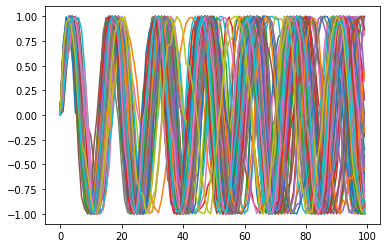

In [557]:
for j in range(0,100):
    sbn.lineplot(np.sin(sol[j,:]))

In [591]:
LKO_R,LKO_theta = TB.CalculateLocalKuramotoOrderParam(bounded_sol,G,delta_x)
#LKO_R_nofft,LKO_theta_nofft = TB.CalculateLocalKuramotoOrderParam(bounded_sol,G,delta_x)

<AxesSubplot: >

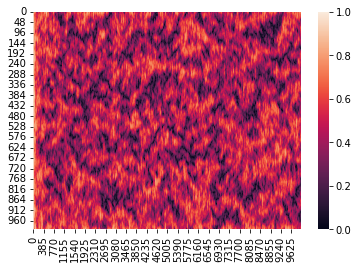

In [592]:
sbn.heatmap(LKO_R,vmin=0,vmax=1)

In [601]:
LKO_R,LKO_theta = TB.CalculateLocalKuramotoOrderParam(bounded_sol,G,delta_x)

<AxesSubplot: >

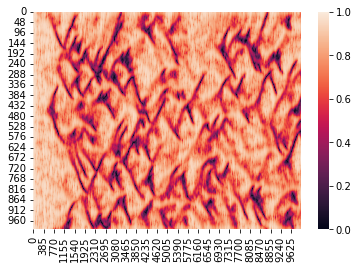

In [602]:
sbn.heatmap(LKO_R,vmin=0,vmax=1)

Really nice turbulence at beta=2.6; sigma=0.1

In [606]:
R, Theta = TB.CalculateGlobalKuramotoOrderParam(sol)

## Using a global feedback control

In [634]:
#Control param
mu = 0.2

#Simulation parameters
#Model parameters
N=1000; T=1000; delta_x=0.1; beta=2.6; sigma=0.1; K=0.05
#Latent parameters
alpha = np.angle(complex(1,beta)); w=beta+1; D= (sigma/K)*np.sqrt(1+beta**2)
#Coupling function
def G(x):
    return 0.5*np.exp(-np.abs(x))
#Integration parameters
#phi_0 = np.random.uniform(low=0,high=2*np.pi,size=N)
phi_0=np.zeros(N)
num_points = 10000; t_0=0

In [635]:
sol_c,t_c = model_c.SolvePhaseHopfModelControlled(phi_0,T,N,w,G,num_points,t_0,delta_x,alpha,D,mu)
bounded_sol_c=np.mod(sol_c,2*np.pi)

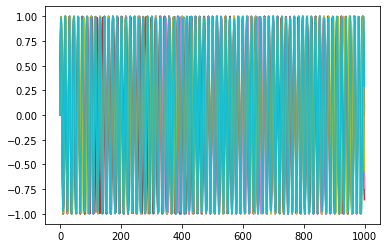

In [631]:
for j in range(0,10):
    sbn.lineplot(np.sin(sol_c[j,:]))

In [636]:
LKO_R_C,LKO_theta_C = TB.CalculateLocalKuramotoOrderParam(bounded_sol_c,G,delta_x)

<AxesSubplot: >

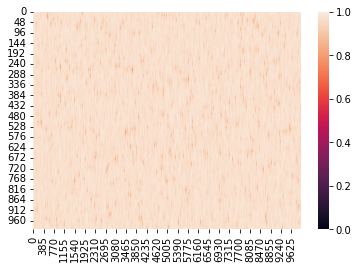

In [637]:
sbn.heatmap(LKO_R_C,vmin=0,vmax=1)